# Lesson 28: Plotting time series, generated data, and ECDFs

(c) 2018 Justin Bois. With the exception of pasted graphics, where the source is noted, this work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

This document was prepared at [Caltech](http://www.caltech.edu) with financial support from the [Donna and Benjamin M. Rosen Bioengineering Center](http://rosen.caltech.edu).

<img src="caltech_rosen.png">

*This lesson was generated from a Jupyter notebook.  You can download the notebook [here](l28_plotting_time_series_generated_data_and_ecdfs.ipynb).*

<br /> <br />

In [1]:
import numpy as np
import pandas as pd
import scipy.special

import altair as alt

import bootcamp_utils

## Plotting (long) time series data

So far, we have seen how to plot measured data. One class of measured data we have not considered is time series data. Time series data are typically not plotted as points, but rather with joined lines. To get some experience plotting data sets like this, we will use some data from [Markus Meister](https://meisterlab.caltech.edu)'s group, collected by graduate students Dawna Bagherian and Kyu Lee. The file `~/git/data/retina_spikes.csv` contains the data set. They put electrodes in the retinal cells of a mouse and measured voltage. From the time trace of voltage, they can detect and characterize spiking events. The first column of the CSV file is the time in milliseconds (ms) that the measurement was taken, and the second column is the voltage in units of microvolts (µV). Let's load in the data.

In [2]:
df = pd.read_csv('data/retina_spikes.csv', comment='#')

df.head()

,t (ms),V (uV)
0,703.96,4.79
1,704.00,-0.63
2,704.04,5.83
3,704.08,0.31
4,704.12,-4.58


To make a plot of these data, we choose `mark_line()`. You may be tempted to specify that the data type of `x` is temporal. You really only want to do that if the data are time (like hours, minutes, seconds) and/or dates. You should still specify the data type of `x` to be quantitative.

In [3]:
alt.Chart(df
    ).mark_line(
    ).encode(
        x='t (ms):Q',
        y=alt.Y('V (uV):Q', title='V (µV)'))

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

Chart({
  data:         t (ms)  V (uV)
  0       703.96    4.79
  1       704.00   -0.63
  2       704.04    5.83
  3       704.08    0.31
  4       704.12   -4.58
  5       704.16   21.67
  6       704.20    8.13
  7       704.24    5.94
  8       704.28   14.79
  9       704.32    2.71
  10      704.36    0.94
  11      704.40   17.40
  12      704.44   11.77
  13      704.48   -2.60
  14      704.52    6.04
  15      704.56   -3.44
  16      704.60   -6.04
  17      704.64   10.42
  18      704.68   19.06
  19      704.72    7.40
  20      704.76    9.79
  21      704.80   20.42
  22      704.84   -0.10
  23      704.88   -7.92
  24      704.92   -7.29
  25      704.96  -11.25
  26      705.00  -12.19
  27      705.04   12.60
  28      705.08   -1.98
  29      705.12  -10.31
  ...        ...     ...
  19971  1502.80  -11.04
  19972  1502.84   -2.92
  19973  1502.88   -6.46
  19974  1502.92  -11.98
  19975  1502.96   -2.40
  19976  1503.00   -2.81
  19977  1503.04  -16.67
  19978  15

Wait! What happend? Altair threw an exception that the data set was too large to generate a plot. The [Altair docs](https://altair-viz.github.io/user_guide/faq.html#why-does-altair-lead-to-such-extremely-large-notebooks) explain why this is.

>This is not because Altair cannot handle larger datasets, but it is because it is important for the user to think carefully about how large datasets are handled. As noted above in Why does Altair lead to such extremely large notebooks?, it is quite easy to end up with very large notebooks if you make many visualizations of a large dataset, and this error is a way of preventing that.

### Handling large data sets with Altair

You will likely bump up against this in your work if you have large data sets. The [docs](https://altair-viz.github.io/user_guide/faq.html#maxrowserror-how-can-i-plot-large-datasets) give several ways to handle large data sets. Passing by URL is your best option, in my opinion. All you need to do to enable this is to include this line of code at the top of your notebook.
```python
alt.data_transformers.enable('json')
```
After you do that, you just use exactly the same plotting code as you would without it, except now the large data sets are easily handled. If this is enabled, every time you make a plot, a new [JSON document](https://en.wikipedia.org/wiki/JSON)is created externally to your notebook. Altair then references this document This keeps your notebook size down and results in better performance. There are a couple of important watchouts for doing this, though.
1. Every time you make a plot, or even re-run a cell to make the same plot again, a new JSON file is created. (Future versions of Altair will probably have hashes that will prevent it from making new files if re-making a plot.) This can result in lots of JSON files in your directory. You should occasionally clean these out.
2. Apparently, the JupyterLab extension for Bokeh (which we will use later in the course) messes with the way JupyterLab routes URL paths, as described in [this issue on the Altair GibHub page](https://github.com/altair-viz/altair/issues/927) and [this one on the `jupyterlab_bokeh` page](https://github.com/bokeh/jupyterlab_bokeh/issues/42). I suspect this issue will be fixed soon.

#### Fix 1 for issue 2
As a temporary fix for issue 2, you can reinstall JupyterLab without the Bokeh extension. To do that, do the following on the command line (**don't** do this for bootcamp; only if in the future you want to use Altair exclusively).

    jupyter labextension uninstall --no-build bokeh_jupyterlab
    jupyter labextension uninstall --no-build @ijmbarr/jupyterlab_spellchecker
    jupyter labextension uninstall --no-build @pyviz/jupyterlab_holoviews
    jupyter labextension uninstall @jupyter-widgets/jupyterlab-manager
    conda uninstall --yes jupyterlab
    conda install --yes jupyterlab

You can reinstall the spell checking lab extension if you wish, using

    jupyter labextension install @ijmbarr/jupyterlab_spellchecker
    
Your clean install of JupyterLab will work with URL referencing in Altair plots.

#### Fix 2 for issue 2

As another temporary fix, you can use classic Jupyter notebooks instead of JupyterLab. The classic notebook will soon be phased out, but for now, you can use Altair with it so long as you have Vega installed. To install Vega, do the following on the command line

    conda install vega
    
You can launch your notebook using the Anaconda Launcher (open a Notebook, not JupyterLab). Right after your import of Altair, include the following lines to enable rendering of Altair plots in the classic notebook and URL passing.

```python
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')
```

Then you can proceed as normal.

### Trying again with a smaller data set

Instead of implementing the fixes to use URL referencing and to keep the notebook size down, we will take a smaller data set. We will use `iloc` for purely integer indexing of the `DataFrame` and only consider 1000 data points.

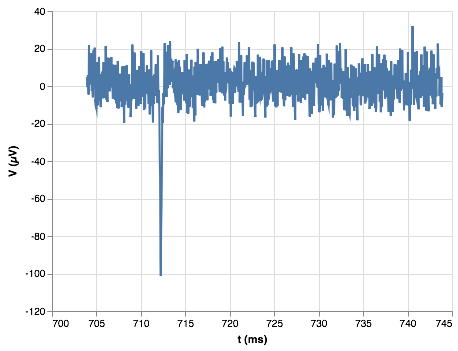

In [4]:
df = df.iloc[:1000, :]

alt.Chart(df
    ).mark_line(
    ).encode(
        x='t (ms):Q',
        y=alt.Y('V (uV):Q', title='V (µV)'))

We see a spike clearly resolved.

### Encoding the order

Remember that there is no inherent order to the entries in a `DataFrame`. (Note that when we do this, `iloc` can be really dangerous to use. In general, you really should avoid using `iloc`.) Altair tries to be clever when making line plots as to the order in which the points are connected. Specifically, it assumes that the lines should be connected such that the `x` values are sorted. This often works fine, but what if we wanted to plot the trace with time on the y-axis and voltage on the x-axis? Let's try it. Before we do, though, I'll point out that by default, Altair starts the y-axis at zero if all of the y-values are positive. If we want to turn that off, we need to use the appropriate `scale` kwarg in `alt.Y()`.

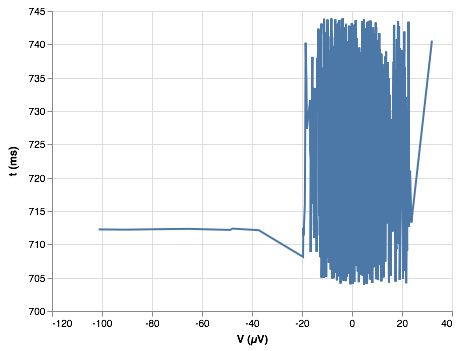

In [5]:
alt.Chart(df
    ).mark_line(
    ).encode(
        y=alt.Y('t (ms):Q', scale=alt.Scale(zero=False)),
        x=alt.X('V (uV):Q', title='V (µV)'))

This plot is clearly messed up. That is because Altair connected the lines in order of voltage. To prevent this, we can use the `order` kwarg of `encode()` to make sure the points are connected in the proper order.

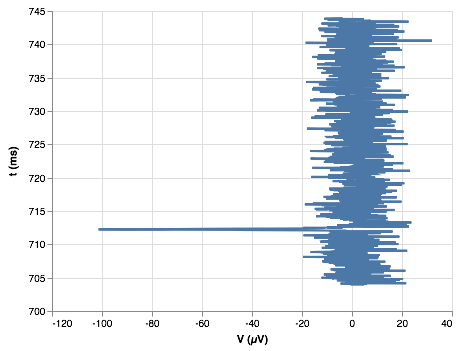

In [6]:
alt.Chart(df
    ).mark_line(
    ).encode(
        y=alt.Y('t (ms):Q', scale=alt.Scale(zero=False)),
        x=alt.X('V (uV):Q', title='V (µV)'),
        order=alt.Order('t (ms):Q', sort='ascending'))

In general, if I am making line plots, I always use an `order` kwarg in the encoding, even if the default behavior is what I want. It's better to be explicit.

## Plotting generated data
You're now a pro at plotting measured data. But sometimes, you want to plot smooth functions. To do this, you can use Numpy and/or Scipy to generate arrays of values of smooth functions that you can then make into a data frame and plot with Altair.

We will plot the [Airy disk](https://en.wikipedia.org/wiki/Airy_disk), which we encounter in biology when doing microscopy as the diffraction pattern of light passing through a pinhole. Here is a picture of the diffraction pattern from a laser (with the main peak overexposed).

![airy_disk.png](airy_disk.png)

The equation for the radial light intensity of an Airy disk is

\begin{align}
\frac{I(x)}{I_0} = 4 \left(\frac{J_1(x)}{x}\right)^2,
\end{align}

where $I_0$ is the maximum intensity (the intensity at the center of the image) and $x$ is the radial distance from the center. Here, $J_1(x)$ is the first order Bessel function of the first kind. Yeesh. How do we plot *that*?

Fortunately, SciPy has lots of special functions available. Specifically, `scipy.special.j1()` computes exactly what we are after! We pass in a NumPy array that has the values of $x$ we want to plot and then compute the $y$-values using the expression for the normalized intensity.

To plot a smooth curve, we use the `np.linspace()` function with lots of points. We then connect the points with straight lines, which to the eye look like a smooth curve.  Let's try it. We'll use 400 points, which I find is a good rule of thumb for not-too-oscillating functions.

In [7]:
# The x-values we want
x = np.linspace(-15, 15, 400)

# The normalized intensity
norm_I = 4 * (scipy.special.j1(x) / x)**2

Now that we have the values we want to plot, we construct a Pandas `DataFrame`. We can do this by instantiating the `pd.DataFrame` class and passing in a dictionary containing the column names and data we generated.

In [8]:
df_airy = pd.DataFrame(data={'x': x, 'norm_I': norm_I})

df_airy.head()

,x,norm_I
0,-15.000000,0.000748
1,-14.924812,0.000767
2,-14.849624,0.000777
3,-14.774436,0.000779
4,-14.699248,0.000772


We can now use this to create an Altair `Chart`.

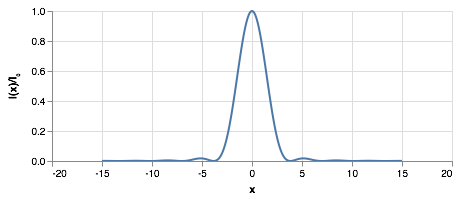

In [9]:
alt.Chart(df_airy,
        height=150
    ).mark_line(
    ).encode(
        x='x:Q',
        y=alt.Y('norm_I:Q', title='I(x)/I₀'),
        order='x:Q')

By default, `ax.plot()` plots lines. We could also plot dots (which doesn't make sense here, but we'll show it just to see). We do not need the `order` kwarg for plotting points.

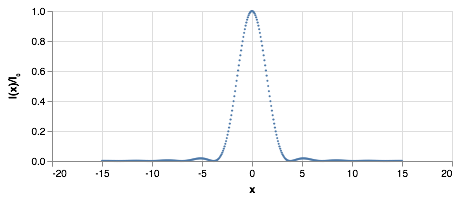

In [10]:
alt.Chart(df_airy,
        height=150
    ).mark_point(
        size=5,
        filled=True,
        opacity=1
    ).encode(
        x='x:Q',
        y=alt.Y('norm_I:Q', title='I(x)/I₀'))

There is one detail I swept under the rug here. What happens if we compute the function for $x = 0$?

In [11]:
4 * (scipy.special.j1(0) / 0)**2

/Users/bois/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

We get a `RuntimeWarning` because we divided by zero. We know that

\begin{align}
\lim_{x\to 0} \frac{J_1(x)}{x} = \frac{1}{2},
\end{align}

so we could write a new function that checks if $x = 0$ and returns the appropriate limit for $x = 0$. In the `x` array I constructed for the plot, we hopped over zero, so it was never evaluated.

## Plotting ECDFs

We have mentioned them many times so far in the bootcamp, and now it is time to plot ECDFs. Remember, an ECDF evaluated at x for a set of measurements is defined as

> ECDF(*x*) = fraction of measurements ≤ *x*.

If we have a `DataFrame`, we can compute the y-values of the ECDF to go with the quantitative column of interest. We worked out a function to compute the ECDF values in a previous lesson. I included the function in the `bootcamp_utils`. As a reminder, here is its full specification.

In [12]:
bootcamp_utils.ecdf_y??

Signature: bootcamp_utils.ecdf_y(data)
Source:   
def ecdf_y(data):
    """Give y-values of an ECDF for an unsorted column in a data frame.
    
    Parameters
    ----------
    data : Pandas Series
        Series (or column of a DataFrame) from which to generate ECDF
        values

    Returns
    -------
    output : Pandas Series
        Corresponding y-values for an ECDF when plotted with dots.

    Notes
    -----
    .. This only works for plotting an ECDF with points, not for formal
       ECDFs
    """
    return data.rank(method='first') / len(data)
File:      ~/Dropbox/git/bootcamp/modules/bootcamp_utils/bootcamp_utils/viz.py
Type:      function


Let's use this to make a plot of ECDFs of facial matching data for insomniacs and non-insomniacs. We'll start by loading the data and including the insomnia column.

In [13]:
# Load in the data set
df = pd.read_csv('data/gfmt_sleep.csv', comment='#')

# Compute insomnia
df['insomnia'] = df['sci'] <= 16

Now, we can group by the `insomnia` column and apply the transform defined in the `ecdf_y()` function.

In [14]:
# Compute y-values for the ECDF for percent correct for each gender
grouped = df.groupby('insomnia')
df['ecdf_y grouped by insomnia'] = grouped['percent correct'].transform(bootcamp_utils.ecdf_y)

And finally, we're ready to plot the ECDF.

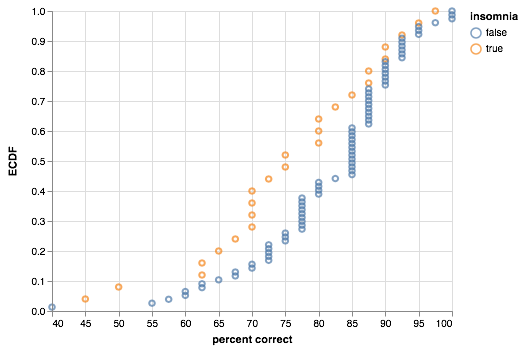

In [15]:
alt.Chart(df,
    ).mark_point(
    ).encode(
        x=alt.X('percent correct:Q', scale=alt.Scale(zero=False)),
        y=alt.Y('ecdf_y grouped by insomnia:Q', title='ECDF'),
        color=alt.Color('insomnia:N'))

Look for example at the data point at 50% correct. That point in the ECDF denotes that about 8% of observations from insomniacs had 50% or less correct responses in the test.

Plotting the ECDF explicitly shows all data points. However, this is strictly speaking not a plot of an ECDF. Remember the y-value of the an ECDF at point *x* is the fraction of all observations less than or equal to *x*. This means that the support of the ECDF is on the entire real number line. In otherwords, the ECDF does have a value at 52% correct. Specifically, ECDF(52) = 0.08. So, formally, the ECDF should be plotted as a line. This requires us to fill in more points than are available in the `DataFrame`, which means we can do some Numpy wrangling. I wrote a function in the `bootcamp_utils` module to do this. Below is the function, and you can look carefully at how I sliced the Numpy arrays to generate a clear staircase-like ECDF.

In [16]:
bootcamp_utils.ecdf_vals??

Signature: bootcamp_utils.ecdf_vals(data, formal=False, x_min=None, x_max=None)
Source:   
def ecdf_vals(data, formal=False, x_min=None, x_max=None):
    """Get x, y, values of an ECDF for plotting.

    Parameters
    ----------
    data : ndarray
        One dimensional Numpay array with data.
    formal : bool, default False
        If True, generate x and y values for formal ECDF (staircase). If
        False, generate x and y values for ECDF as dots.
    x_min : float, 'infer', or None
        Minimum value of x to plot. If 'infer', use a 5% buffer. Ignored
        if `formal` is False.
    x_max : float, 'infer', or None
        Maximum value of x to plot. If 'infer', use a 5% buffer. Ignored
        if `formal` is False.

    Returns
    -------
    x : ndarray
        x-values for plot
    y : ndarray
        y-values for plot
    """
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)

    if formal:
        # Set up output arrays
        x_formal = np.empty(2*

Also included in the module is a handy function to give you a `DataFrame` that you can use to plot formal ECDFs (or ECDFs with dots if you like) using Altair.

In [17]:
df_ecdf = bootcamp_utils.ecdf_dataframe(df, 'percent correct', color='insomnia', formal=True)

df_ecdf.head()

,insomnia,percent correct,ECDF
0,False,37.0,0.000000
1,False,40.0,0.000000
2,False,40.0,0.000000
3,False,40.0,0.012987
4,False,55.0,0.012987


Looks good.

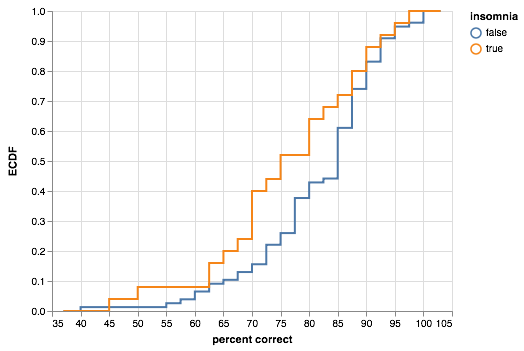

In [20]:
formal = alt.Chart(df_ecdf
    ).mark_line(
    ).encode(
        x='percent correct:Q',
        y='ECDF:Q',
        color='insomnia:N',
        order='percent correct:Q')

formal

Here are a couple of formal ECDFs. To see how they relate to ECDFs with dots, we can overlay the two.

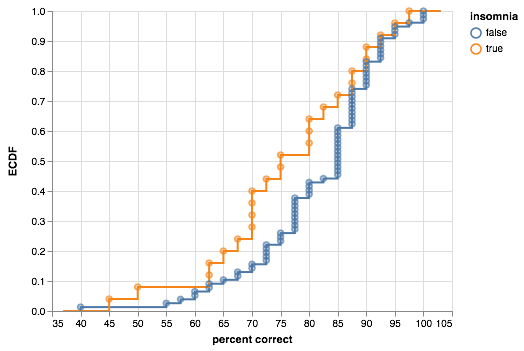

In [21]:
dots = alt.Chart(df,
    ).mark_point(
    ).encode(
        x=alt.X('percent correct:Q', scale=alt.Scale(zero=False)),
        y=alt.Y('ecdf_y grouped by insomnia:Q', title='ECDF'),
        color=alt.Color('insomnia:N', legend=None))

formal + dots

The dots are the concave corners of steps in the staircase. They give the same amount of information as the steps. For intermediate numbers of points in a data set, I prefer dots. For large or very small data sets, I prefer formal ECDFs.